##### TP 3 -- Informatique CM3 -- 2016-2017 

# Python @ Polytech'Lille

Le texte de cette session de travaux pratiques est également disponible ici:

http://nbviewer.ipython.org/github/ecalzavarini/python-at-polytech-lille/blob/master/Python-TP3-2016.ipynb

### Modalités pour accomplir le TP et compte rendu 

Nous vous rappelons les modalités pour accomplir ce TP :

Vous aurez à écrire plusieurs scripts (script1.py , script2.py , ...). Les scripts doivent être accompagnés par un document descriptif unique (README.txt). Dans ce fichier, vous devrez décrire le mode de fonctionnement des scripts et, si besoin, mettre vos commentaires. Merci d'y écrire aussi vos noms et prenoms complets.
Tous les fichiers doivent être mis dans un dossier appelé TP3-nom1-nom2 et ensuite être compressés dans un fichier archive TP3-nom1-nom2.tgz .

Enfin vous allez envoyer ce fichier par email à l'enseignant: soit Enrico (enrico.calzavarini@polytech-lille.fr) soit Stefano (stefano.berti@polytech-lille.fr).



#### Vous avez une semaine de temps pour compléter le TP, c'est-à-dire que la date limite pour envoyer vos travaux c'est dans 7 jours à partir d'aujourd'hui.

### Tracer le graphique d'un champ vectoriel en deux dimensions

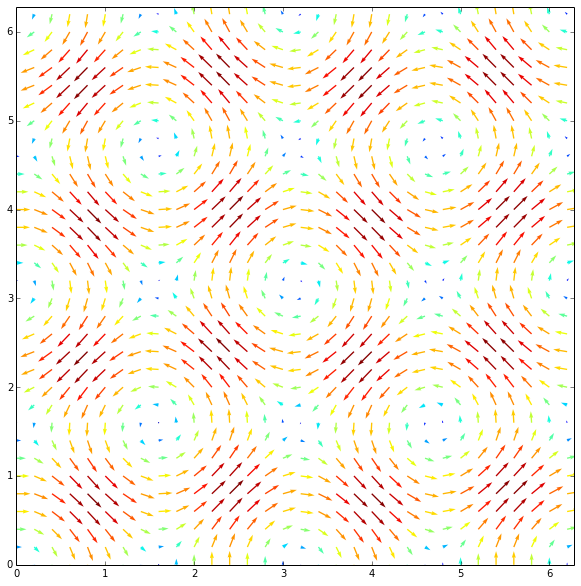

In [5]:
%matplotlib inline 

import matplotlib.pylab as plt
import numpy as np
from math import *

x = np.arange(0,2*pi,0.2)
y = np.arange(0,2*pi,0.2)

# np.meshgrid, produit une matrices de coordonnées à partir de deux vecteurs. 
X,Y = np.meshgrid(x,y) # grille bidimensionnelle

#définition du champ vectoriel
U = np.sin(Y)*np.cos(Y)
V = -np.cos(X)*np.sin(X)

C =  ( U**2. + V**2. )**.5 # calcul du module du vecteur

plt.figure( figsize=(10,10) )  # taille de la figure : 10 x 10 pouces

plt.quiver( X, Y, U, V , C , scale = 20.) #trace le graphyque du champ vectoriel

plt.axis([0, 2*pi, 0, 2*pi])
plt.axes().set_aspect(1)

plt.show()

À noter que dans "plt.quiver( X, Y, U, V , C , scale = 20.)" le paramètre "scale" règle la taille d'affichage des flèches selon le souhait de l'utilisateur. Une valeure de "scale" plus petite produit des flèches  plus larges.

## Script 1 : Comprendre la déformation de type cisaillement

Écrire  un script qui effectue les calculs et actions suivantes. 

a) Il trace le graphique d'un champ de déformation de type cisaillement, c'est-à-dire  

$$ {\bf u} = (u_x, u_y) = \left( \begin{array}{cc}
\partial_x u_x  & \partial_y u_x \\
\partial_x u_y  & \partial_y u_y \end{array} \right) 
\left( \begin{array}{c}
x   \\
y  \end{array} \right)=  
\left( \begin{array}{c}
\gamma y   \\
0  \end{array} \right)$$


où  $\gamma = \partial_y u_x$ est le taux de déformation, ici supposée constant. 

Ici on utilisera les paramètres suivants:
$$
\gamma = 0.12; \, x,y \in [-h,h]; \, h = 20.
$$

b) Il calcule la matrice gradient de déformation: 
$$ \nabla u =  \left( \begin{array}{cc}
\partial_x u_x & \partial_y u_x  \\
\partial_x u_y & \partial_y u_y \end{array} \right). $$

c) Il décompose cette matrice dans sa partie symétrique ($S$) et dans sa partie antisymétrique ($A$) :

$$ S = \frac{1}{2}\left(\nabla u  + (\nabla u )^T \right) $$

$$ A = \frac{1}{2}\left(\nabla u  - (\nabla u )^T \right). $$

d) Il calcule le champ de déformation correspondant à $S$ et $A$, appellés respectivement $u_S$ et $u_A$.

e) Il trace les graphiques de deux nouveaux champs de déformation, $u_S$ et $u_A$. 

f) Enfin, il trace le graphique de la somme de $u_S$ et $u_A$.

Qu'apprenons-nous des ces quatre graphiques ?

Dans les cours de mécanique des milieux continus, on entend souvent dire qu'une déformation de type cisaillement est équivalente à la somme d'une rotation (champ $A$) et d'un étirement, élongation et compression, (champ $S$). 
Avec ce script, vous montrerez d'une façon graphique que cette affirmation est bien vérifiée.

### Tranpsosition d'une matrice avec les arrays de $numpy$

In [6]:
import numpy as np

a = np.array([[1,2],[3,4]]) # a: matrice 2 x 2
print("a = ")
print(a)

at=np.transpose(a) # transposition de la matrice a
print("at = ")
print(at)

a = 
[[1 2]
 [3 4]]
at = 
[[1 3]
 [2 4]]


## Script 2 : Transport du vecteur vitesse

On veut écrire un script qui met en oeuvre une relation notable de la cinématique des solides rigides: la formule du transport du vecteur vitesse entre deux points $A$ et $B$ appartenants à un même solide $S_1$ (en mouvement par rapport à un autre solide $S_0$):

$$\vec{\bf V}(B \in S_1/S_0) = \vec{\bf V}(A \in S_1/S_0) + \vec{\bf \Omega}_{S_1/S_0} \wedge \vec{\bf AB}$$

Plus précisément, le script devra demander à l'utilisateur les coordonnées des points $A$ et $B$, la vitesse en $A$ ainsi que le vecteur rotation $\vec{\bf \Omega}_{S_1/S_0}$ du solide $S_1$ par rapport au solide $S_0$. Il calculera le vectur vitesse en $B$ et sa norme $|\vec{\bf V}(B \in S_1/S_0)|$, où $|\vec{\bf V}|=\sqrt{{\bf V}\cdot{\bf V}}$. 

Il peut être ici utile de se rappeler de l'expression suivante du produit vectoriel entre les vecteurs $\vec{\bf{\Omega}}=(\Omega_x,\Omega_y,\Omega_x)$ et $\vec{AB}=(x,y,z)$:

$$
\vec{\bf{\Omega}} \wedge \vec{AB}=
\left| \begin{array}{ccc}
\vec{i} & \vec{j} & \vec{k}  \\
\Omega_x & \Omega_y & \Omega_z \\
x & y & z
\end{array} \right| = 
\vec{i} \left| \begin{array}{cc}
\Omega_y & \Omega_z \\
y & z
\end{array}
\right| - 
\vec{j} \left| \begin{array}{cc}
\Omega_x & \Omega_z \\
x & z
\end{array}
\right| + 
\vec{k} \left| \begin{array}{cc}
\Omega_x & \Omega_y \\
x & y
\end{array}
\right|,
$$

où les barres verticales indiquent des déterminants et $\vec{i}$, $\vec{j}$, $\vec{k}$ les vecteurs unitaires de la base d'un système de coordonnées.

En utilisant des operations simples sur les éléments des arrays (vecteurs ou matrices), ainsi que des boucles $for$, écrivez par vous-mêmes les deux fonctions qui effectuent le produit scalaire et le produit vectoriel de deux vecteurs, même si, comme vous pouvez l'imaginer, $numpy$ possède déjà des fonctions pour cela faire, qui sont très pratiques à utiliser:

In [7]:
import numpy as np

a = np.array([1,2,3])
b = np.array([0,1,5])

np.dot(a,b) # produit scalaire

17

In [8]:
np.cross(a,b) # produit vectoriel

array([ 7, -5,  1])

Vérifiez que votre script est correct en utilisant les fonctions ci-dessus.

Vue la nécessité de rentrer certaines données (les coordonnées des points et les composantes des vecteurs) plusieurs fois, il pourrait être pratique de définir aussi une fonction pour la lecture de ce type de données. 

## Script 3 : Propagation d'une perturbation

L'équation de convection linéaire est une modèle mathématique simple décrivant la propagation d'un champ scalaire (tel qu'une perturbation, une vague, une vibration, ou bien un champ de concentration d'une substance chimique) dans un milieu à dissipation négligeable. Elle est utilisée dans une large gamme de domaines qui vont de la météorologie à l'océanographie, à la physique et l'ingénierie. Cette équation s'écrit:  

$$ \frac{\partial u}{\partial t} + c \frac{ \partial u}{\partial x} = 0$$

Si la condition initiale (entendue comme la forme de la perturbation initiale) est $u(x, t=0) = u_0 (x)$ , on peut montrer que la solution exacte de l'équation est $u (x, t) = u_0 (x-ct)$, c'est-à-dire que la perturbation se propage sans changement de forme avec une vitesse $c$.

Pour la résoudre numériquement, nous pouvons discrétiser cette équation dans l'espace et dans le temps en utilisant le schéma de différences finies en avant pour la dérivée temporelle et le schéma de différences finies en arrière pour le dérivée par rapport à l'espace. Pensez à la discrétisation des coordonnées spatiales $x$ en points désignés par un indice $i$ qui varie de $0$ à $N$, et la disctérisation temporelle par intervalles de temps discrets de taille $\Delta t$. 

A partir de la définition de dérivée (en supprimant tout simplement la limite), nous savons que:

$$\frac{\partial u}{\partial x} \simeq \frac{u(x+\Delta x) - u(x)}{\Delta x} $$

Notre équation discrète, alors, est:

$$\frac{u_i^{n+1} - u_i^{n}}{\Delta t} + c \frac{u_i^{n+1} - u_{i-1}^{n}}{\Delta x} = 0$$

Où $n$ et $n + 1$ sont deux étapes consécutives dans le temps, tandis que $i-1$ et $i$ sont deux points voisins de la coordonnée discrétisée $x$. Si on donne les conditions initiales, la seule inconnue dans cette discrétisation est $u_i^{n+1}$. Nous pouvons résoudre pour notre inconnue pour obtenir une équation qui nous permet d'avancer dans le temps, comme suit:


$$u_i^{n+1} = u_i^{n} - c \frac{\Delta t}{\Delta x}(u_i^{n} - u_{i-1}^n)$$

### Écrire un script qui effectue les calculs et les actions suivantes :

1) Il définit une grille unidimensionnelle de $N=81$ points régulièrement espacés  dans un domaine spatial qui fait $2$ mètres de longueur, c'est-à-dire $x \in [0,2] \, m$. Il définit ainsi la variable $\Delta x$ comme la distance entre deux points adjacents de la grille.

2) Il met en place les conditions initiales suivantes. La condition initiale $u_0$ a la valeur $u = 2$ (en unités arbitraires, dans la suite $u.a.$) dans l'intervalle $0.5 \ m  ≤ x ≤ 1 \ m$ et $u = 1 \ (u.a.)$ partout ailleurs dans $[0,2] \, m$ (c'est-à-dire une fonction chapeau). 

3) Il trace un graphique de la condition initiale.

4) Il définit une fonction pour calculer $u$  au pas de temps futur ($n+1$) à partir de la valeur de $u$ au pas de temps présent ($n$). La valeur affectée à la variable pas de temps sera $\Delta t = 0.25 \ s$, et on posera la valueur $c = 1 \ m /s$ pour la vitesse de la perturbation dans le milieu.

5) Il trace sur le même graphique que celui utilisé pour la condition initiale (mais avec une autre couleur) la fonction $u$ au temps $t=6.25\ s$.

### Quelques operations utiles sur les arrays de $numpy$

Le fonctionnement de la fonction $ones()$ est analogue à celui de la fonction $zeros()$ qu'on a déjà rencontré, voir l'exemple suivant: 

In [9]:
import numpy as np

np.ones(10)      # fonction ones() pour un array de 10 éléments

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Il est possible de faire des cycles implicites sur les arrays de $numpy$, comme dans l'exemple suivant. Cette opération permet de manipuler toute une partie d'un array en même temps, sans devoir recourir à une boucle explicite (de type $for$ ou $while$).

In [10]:
import numpy as np

a = np.array([1,10])
a = [1,2,3,4,5,6,7,8,9,10]
b = a[2:7]
print("a = ")
print(a)
print("b = ")
print(b)

a = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = 
[3, 4, 5, 6, 7]


Pour copier les éléments d'un arrays dans un autre array, il est possible de travailler comme dans les exemples suivants. 

In [11]:
import numpy as np

a=np.array([1, 2, 3, 4, 5])
print("a = ")
print(a)

b=a.copy()      # première méthode
print("b = ")
print(b)

c=np.copy(a)   # seconde méthode
print("c = ")
print(c)


a = 
[1 2 3 4 5]
b = 
[1 2 3 4 5]
c = 
[1 2 3 4 5]


## Script 4 (Bonus): Moments d'inertie d'une plaque d'aluminium

La matrice d'inertie d'un solide $S$, au point $O$ dans la base de coordonnées $(\vec{x},\vec{y},\vec{z})$, s'écrit : 

$$[I_0(S)]  = \left( \begin{array}{ccc}  
I_{Ox} & -I_{Oxy} & -I_{Ozx} \\
  -I_{Oxy}     &  I_{Oy} & -I_{Oyz} \\
 -I_{Ozx}      & -I_{Oyz} & I_{Oz}  \\
\end{array} \right)_{(\vec{x},\vec{y},\vec{z})} $$

avec $I_{Ox}$ , $I_{Oy}$ et $I_{Oz}$, moments d'inertie par rapport aux axes du repère $(\vec{x},\vec{y},\vec{z})$:

$$I_{Ox} = \int_{P\in S} (y^2+z^2)\ dm$$

$$I_{Oy} = \int_{P\in S} (z^2+x^2)\ dm$$

$$I_{Oz} = \int_{P\in S} (x^2+y^2)\ dm$$

et $I_{Oxy}$ , $I_{Oyz}$ et $I_{Oyz}$ les produits d'inertie par rapport aux axes du même repère : 

$$I_{Oyz} = \int_{P\in S} yz \ dm$$

$$I_{Ozx} = \int_{P\in S} zx \ dm$$

$$I_{Oxy} = \int_{P\in S} xy \ dm$$

Le symbole $dm$ dans les intégrales ci-dessus représente un élément infinentesimal de masse du solide et le domaine de l'intégration est pris sur tous les points $P$ du solide $S$.

Dans ce script, nous souhaitons calculer la matrice d'inertie $I_{O}(S)$ pour une plaque  rectangulaire homogène en aluminium.

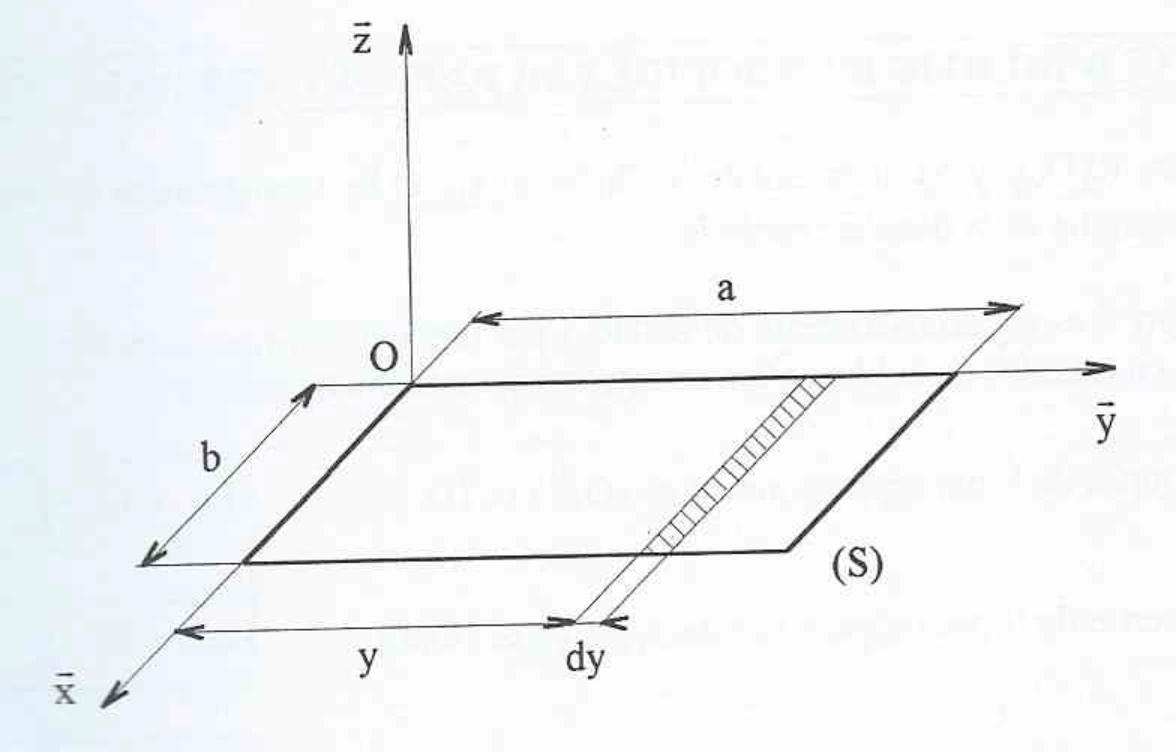

In [12]:
from IPython.display import Image
Image(filename='fig_plaque.jpg')

La plaque, voir aussi la figure ci-dessus, mesure $5\ m$ de longueur (direction y), $2\ m$ de largeur (direction x) et juste un $1 \ cm$ d'épaisseur (direction z). 
La densité massique de l'aluminium est $\rho_{Al} = 2.7 \ g / cm^{3}$. A partir de ces 
données on peut calculer la densité massique surfacique de la plaque ainsi que sa masse totale. 

Le script doit être composé par des fonctions, qui effectuent le calcul des intégrales de façon numérique (c'est-à-dire en effectuant des sommations). 
La valeur de la précision ($\Delta$, mesurée en mètres), indiquant le niveau de discrétisation spatiale dans les intégrales, devra être introduite par l'utilisateur au début du script.

Suggestions :
1) étant donné le faible épaisseur de la plaque on peut négliger la coordonnée $z$ dans le calcul des integrales.
2) Pour une convergence rapide des calculs, choisir $\Delta > 1\ mm$.

### Multiplication élément par élément des tableaux numpy

Il y a deux manières de multiplier élément par élément les arrays $numpy$: soit avec le simple operateur $*$ soit avec la fonction $np.multiply$. Cette deuxième possibilté offre plus de flexibilité. Regardez les exemples ci-dessous:    

In [13]:
x=np.linspace(0,1,11)
print(x)

y = x*x   # en utilisant le symbole de multiplication
print(y)

z = np.multiply(x,x)[:]   # en utilisant la fonction de multiplication 
print(z)

w = np.multiply(x,x)[3:6]  # choisir uniquement les éléments entre 3 et 5 
print(w)

h = np.multiply(x,x)[1:10:2] # choisir uniquement les éléments paires du tableau  
print(h)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.    0.01  0.04  0.09  0.16  0.25  0.36  0.49  0.64  0.81  1.  ]
[ 0.    0.01  0.04  0.09  0.16  0.25  0.36  0.49  0.64  0.81  1.  ]
[ 0.09  0.16  0.25]
[ 0.01  0.09  0.25  0.49  0.81]


In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open('custom.css', 'r').read()
    return HTML(styles)
css_styling()